
# Project: Investigating Gun Ownership

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Guns have been part of American culture ever since the Revolutionary War, and attitudes towards guns vary significantly compared to attitudes in the rest of the world. However, this has led to mixed feelings among the populace, between some who strongly value their Second Amendment rights, and some who are concerned about the usage of guns in violent crimes. Because of these varying attitudes towards guns, it's natural to ask who's buying the guns.

Specific questions that can address this, and ones which this study will attempt to examine, are as follows. Is there any correlation between guns and the ethnic composition of states - namely states with higher populations of White, Black, Hispanic, Asian, and Native people? Is there any correlation between guns and the gender composition of states? Is there any correlation between guns and states with higher education levels? Is there any correlation between guns and states with higher income levels? How have gun purchases changed over time, and is there any consistent pattern between states?

The Federal Bureau of Investigations regulates gun ownership to some extent with background checks, and the US Census Bureau keeps track of varying demographics. Data from these organizations were used for this study.

In [25]:
# Import the necessary packages for extracting and analyzing data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The first step is actually to turn the FBI's gun data from the xlsx format into the csv format, so it can be loaded here. This can be done in another program like Microsoft Excel.

In [26]:
# Load the data
df_gun = pd.read_csv("gun-data.csv")
df_census = pd.read_csv("u.s.-census-data.csv")

In [27]:
# Examine the gun data
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [28]:
# Examine the census data
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [29]:
# See which months are covered by the gun data.
df_gun["month"].unique()

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

In [30]:
# See which states were part of the gun data collection
df_gun["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [31]:
# See what demographics were studied in the census
df_census["Fact"].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

Some details pop out about these databases. First and foremost, the gun data is organized by month and state, while the census data is organized by state, but with one listing states by rows and the other listing states by columns. Second, the gun data includes territories, while the census data doesn't. Third, the census data has different formats in some states: some use strings and include dollar signs and percents, while some use strings and give actual numbers, but a few even use letters to stand in (like "Z" for something greater than zero but less than half the minimum measurable unit). Fourth, there are plenty of null values where entries are not applicable. Fifth, the categories in the census data are rather specific, and as a result create long labels.


### Data Cleaning

First, note where the null values are:

In [32]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

While the reasons for null values in this data set might be because no data was collected or there was no data to enter, the most relevant columns - month, state, totals - have no null values. Since these are the ones of interest for this study, it makes sense to select them (instead of dropping all null columns, as there are several of those but only three of these).

In [33]:
df_gun = pd.concat([df_gun["month"],df_gun["state"],df_gun["totals"]], axis=1)
df_gun.isnull().sum()

month     0
state     0
totals    0
dtype: int64

A quick glance over the original data shows no apparent duplicate entries, but it's still worthwhile to check.

In [34]:
df_gun.duplicated().any()

False

For the census data:

In [35]:
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

The main problem is that "dropna" won't work, because it will eliminate all rows. The reason is that one column has a bunch of notes for facts, but lists "NaN" for many categories. The workaround is to drop this one column, then drop all rows with null values.

In [36]:
df_census.drop("Fact Note", axis=1, inplace=True)
df_census.dropna(inplace=True)

Another quick glance over the original data shows there were no duplicate categories of demographics, but checking:

In [37]:
df_census.duplicated().any()

False

To merge the census data with the gun data in any meaningful form, the dataframe must be transposed so the states become the rows. However, one column - "Fact" - is not a state, so to ensure it is done correctly, this would be made into the new index.

In [38]:
df_states = df_census.set_index("Fact")                            #Reset the index
df_states = df_states.transpose()                                  #Transpose
df_states.reset_index(inplace=True)                                #Make new index for states
df_states.rename({"index":"state"}, axis="columns", inplace=True)

In [39]:
# Use this to find the categories later
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
state                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, p

Next, columns with percentages should be converted to floats. Any string that ends with a percent symbol needs to be divided by 100, but only those strings. Anything using another symbol to stand in for zero should be converted as well.

The idea for the code is based on this: https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

Plus this: https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

In [40]:
def percent2float(df):
    p2f = lambda x: pd.to_numeric(x.replace("Z","0").replace("FN","0").rstrip("%"))/100.0
    return df.applymap(p2f)

# The "replace" commands swap a 0 in.
# The "rstrip" command removes the tailing percent symbol.
# The "to_numeric" command turns the string into a number.
# Dividing by 100 ensures consistency in the percent's meaning.
# The "applymap" function is built-in, and vectorizes the column operations for multiple columns in a dataframe.

In [41]:
cols = np.concatenate([np.arange(5,21),[25],np.arange(33,41),[50,54]])    #Columns with percent symbols
rows = np.concatenate([np.arange(0,30),np.arange(42,50)])                 #Rows with percent symbols

df_states.iloc[rows,cols] = percent2float(df_states.iloc[rows,cols])

In [42]:
def string2float(df):
    s2f = lambda x: pd.to_numeric(x)
    return df.applymap(s2f)

# Some entries have percentages but no percent symbol; it suffices to use "to_numeric".

In [43]:
cols = np.concatenate([np.arange(5,21),[25],np.arange(33,41),[50,54]])    #Columns with percent symbols
rows = np.arange(30,42)                                                   #Rows with percentages as decimals

df_states.iloc[rows,cols] = string2float(df_states.iloc[rows,cols])

Similarly, columns with dollar signs should be converted to numbers as well. Commas, if present, need to be removed. The code uses the same idea as above.

In [44]:
def dollar2float(df):
    d2f = lambda x: pd.to_numeric(x.lstrip("$").rstrip(" ").replace(",",""))
    return df.applymap(d2f)

# The "lstrip" command removes any initial dollar symbol.
# The "rstrip" command removes tailing spaces.
# The "replace" command removes interior commas.

In [45]:
cols = np.concatenate([np.arange(26,30),[46,48,49]])   #Columns with dollar symbols
rows = np.arange(0,50)

df_states.iloc[rows,cols] = dollar2float(df_states.iloc[rows,cols])

Populations are included as string types as well. Just remove the commas and convert to floats with the same process.

In [46]:
def comma2float(df):
    c2f = lambda x: pd.to_numeric(x.replace(",",""))
    return df.applymap(c2f)

In [47]:
cols = [1,2,4]           #Columns with populations
rows = np.arange(0,50)

df_states.iloc[rows,cols] = comma2float(df_states.iloc[rows,cols])

In case one wants to save these edits so as to not have to rerun the above code:

In [48]:
# save
df_gun.to_csv("gun_edited.csv", index=False)
df_states.to_csv("states_edited.csv", index=False)

In [49]:
# reload
df_gun = pd.read_csv("gun_edited.csv")
df_states = pd.read_csv("states_edited.csv")

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Guns and Demographics

Is gun ownership/sales related to ethnicity? To age? To education? To income? The following will attempt to give insight into that by calculating per capita gun sales by state, grouping them into quartiles, and seeing which states are higher than average in various categories.

First, group states by their populations of ethnicities, genders, ages, education, and income. Check whether each state is above or below average compared to the rest of the states in a given statistic.

In [50]:
def cat_state(demo):
    return df_states[demo] > df_states[demo].mean()   #Gives a boolean variable for whether the state is above
                                                      #the mean out of all states for that demographic.

In [51]:
# Creates boolean columns for multiple demographics of interest.
df_states_eth_w = cat_state("White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)")
df_states_eth_b = cat_state("Black or African American alone, percent, July 1, 2016,  (V2016)")
df_states_eth_h = cat_state("Hispanic or Latino, percent, July 1, 2016,  (V2016)")
df_states_eth_a = cat_state("Asian alone, percent, July 1, 2016,  (V2016)")
df_states_eth_n = cat_state("American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)")
df_states_gen_f = cat_state("Female persons, percent,  July 1, 2016,  (V2016)")
df_states_age_y = cat_state("Persons under 18 years, percent, July 1, 2016,  (V2016)")
df_states_age_o = cat_state("Persons 65 years and over, percent,  July 1, 2016,  (V2016)")
df_states_edu_h = cat_state("High school graduate or higher, percent of persons age 25 years+, 2011-2015")
df_states_edu_c = cat_state("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015")
df_states_inc_h = cat_state("Median household income (in 2015 dollars), 2011-2015")
df_states_inc_p = cat_state("Per capita income in past 12 months (in 2015 dollars), 2011-2015")

Concatenate these results with the state list and populations, and relabel the columns to shorter names.

In [52]:
# Concatenates these into one dataframe.
df_demographic = pd.concat([df_states["state"],df_states["Population estimates, July 1, 2016,  (V2016)"],df_states_eth_w,
                            df_states_eth_b,df_states_eth_h,df_states_eth_a,df_states_eth_n,df_states_gen_f,df_states_age_y,
                            df_states_age_o,df_states_edu_h,df_states_edu_c,df_states_inc_h,df_states_inc_p],axis=1)
df_demographic.set_axis(["state","Population 2016","White","Black","Hispanic","Asian","Native","Female","Young","Old",
                         "High School","College","Income household","Income per capita"], axis=1, inplace=True)

Now we want gun totals over the years. One column already lists the total by state and month, so it suffices to use a groupby to sum over all the months, per state.

In [53]:
# Sums the gun totals over all months reported, per state
df_gun_total = df_gun.groupby(["state"], as_index=False)["totals"].sum()

Next, to merge this with the census categories. An inner merger on the states will remove any of the territories not of interest.

In [54]:
# Merges onto the demographic dataframe.
df_stat = pd.merge(df_gun_total, df_demographic, on="state", how="inner")

To make a level comparison between the states, which can have very different populations, the guns per capita is calculated next, and appended to the dataframe.

In [55]:
df_gpc = df_stat["totals"]/pd.to_numeric(df_stat["Population 2016"])   #Divides guns by population

df = pd.concat([df_stat, df_gpc], axis=1)                              #Concatenates onto the above dataframe
df.rename(columns={0:"Guns per capita"}, inplace=True)
df.head()

,state,totals,Population 2016,White,Black,Hispanic,Asian,Native,Female,Young,Old,High School,College,Income household,Income per capita,Guns per capita
0,Alabama,6706079,4863300,False,True,False,False,False,True,False,True,False,False,False,False,1.378915
1,Alaska,1137643,741894,False,False,False,True,True,False,True,False,True,False,True,True,1.533431
2,Arizona,4425714,6931071,False,False,True,False,True,False,True,True,False,False,False,False,0.638532
3,Arkansas,3752633,2988248,True,True,False,False,False,True,True,True,False,False,False,False,1.255797
4,California,19014063,39250017,False,False,True,True,False,False,True,False,False,True,True,True,0.484435


To get a sense of where these states are relative to each other, examine the overall statistics of guns per capita, and split them by whether the state is above or below the average for a certain demographic. Side-by-side histograms can be used to compare the distributions.

The method for plotting was based off of this: https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib

In [56]:
df["Guns per capita"].describe()

count    50.000000
mean      1.030104
std       0.908643
min       0.128107
25%       0.697868
50%       0.909571
75%       1.181876
max       6.707822
Name: Guns per capita, dtype: float64

Even at a glance, the maximum is much further away from either the median or the interquartile range than the minimum is, which may indicate an outlier or a skewed distribution. It is helpful to look at the overall distribution before splitting into categories.

Text(0,0.5,'State count')

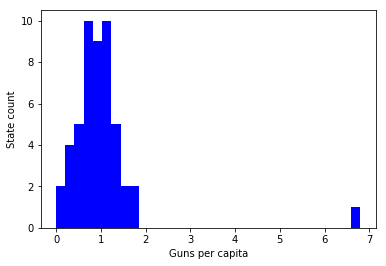

In [57]:
bins = np.linspace(0,6.8,34)                                    #Creates bins using the descriptory statistics
plt.hist(df["Guns per capita"], bins, alpha=1, color='blue')    #Plots histogram
plt.xlabel('Guns per capita')                                   #Label x-axis
plt.ylabel('State count')                                       #Label y-axis

<function matplotlib.pyplot.show(*args, **kw)>

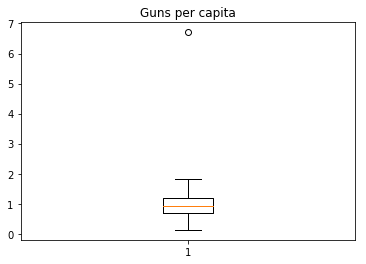

In [58]:
plt.boxplot(df["Guns per capita"])   #Creates boxplot
plt.title('Guns per capita')         #Title
plt.show

As expected from the summary statistics, the histogram and the boxplot show an outlier, which is far above the rest of the distribution. The distribution itself appears to be single-peaked, and slightly asymmetrical even ignoring the outlier.

By the way, to find which state that outlier is:

In [59]:
df[df["Guns per capita"]==df["Guns per capita"].max()]["state"]    #Locate maximum, then identify state

16    Kentucky
Name: state, dtype: object

Kentucky is that outlier, and because of this, any attempt to find a correlation coefficient between guns per capita and a quantitative variable will be irregularly influenced by one state. It instead makes sense to compare the overall distributions between states above/below the average demographic, then compare from there.

In [60]:
def plt_stat(demo):
    dfy = df[df[demo]]["Guns per capita"]                                #Selects the higher than average
    dfn = df[~df[demo]]["Guns per capita"]                               #Selects the lower than average
    bins = np.linspace(0,6.8,34)                                         #Creates bins
    plt.hist(dfy, bins, alpha=0.5, label='More ' + demo, color='green')  #Histogram for higher than average
    plt.hist(dfn, bins, alpha=0.5, label='Less ' + demo, color='red')    #Histogram for lower than average
    plt.legend(loc='upper right')                                        #Legend
    plt.xlabel('Guns per capita')                                        #Label x-axis
    plt.ylabel('State count')                                            #Label y-axis
    plt.title(demo)                                                      #Title is the demographic
    plt.show

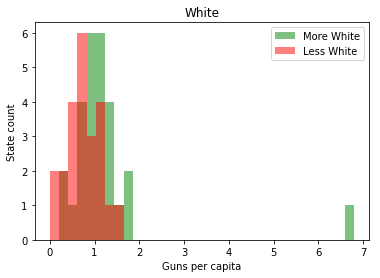

In [61]:
plt_stat("White")

The distribution of states with more White people appears to have a higher mean, indicating more guns per capita.

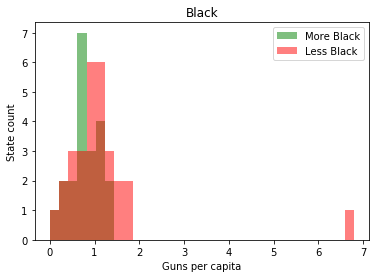

In [62]:
plt_stat("Black")

In contrast, the distribution of states with more Black people appears to have a lower mean.

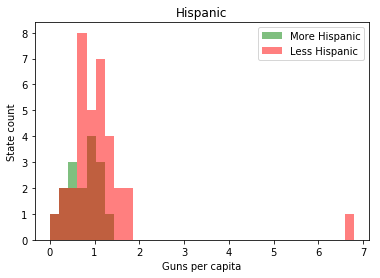

In [63]:
plt_stat("Hispanic")

Similarly, the distribution of states with more Hispanic people appears to have a lower mean.

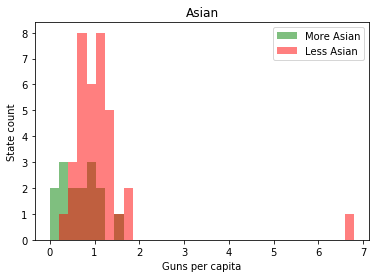

In [64]:
plt_stat("Asian")

Similarly, the distribution of states with more Asian people appears to have a lower mean.

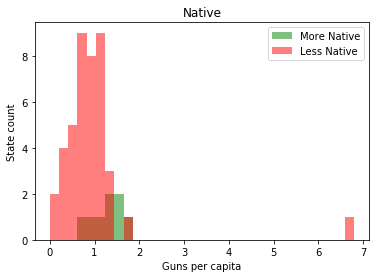

In [65]:
plt_stat("Native")

On the other hand, it is harder to draw a conclusion about states with more/fewer Native people, as there are so few states with a more than average Native population. This may indicate a skew distribution for Native percent populations among states.

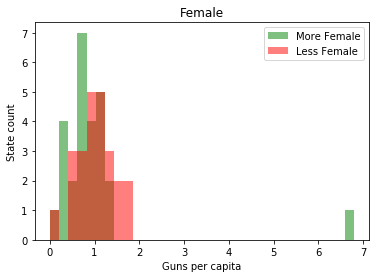

In [66]:
plt_stat("Female")

The states with more females seem to have a distribution with a lower peak, but the presence of the outlier also makes it more difficult to draw a conclusion here.

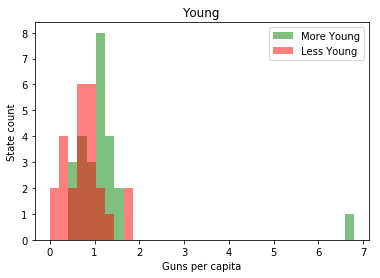

In [67]:
plt_stat("Young")

The distribution of states with more minors appears to have a higher mean.

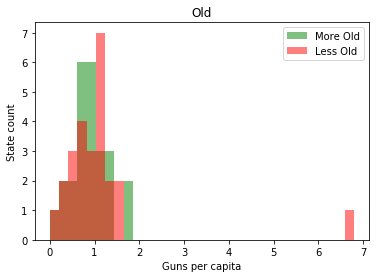

In [68]:
plt_stat("Old")

There is much overlap between the distributions of states with more and fewer seniors, so no conclusion can easily be drawn.

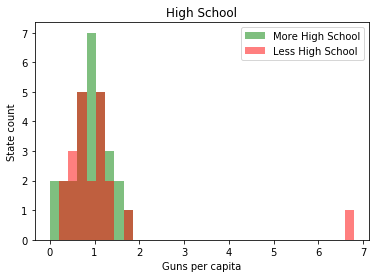

In [69]:
plt_stat("High School")

Similarly, there is much overlap between the distribution of states with more and fewer high school educated people, so no conclusion can easily be drawn.

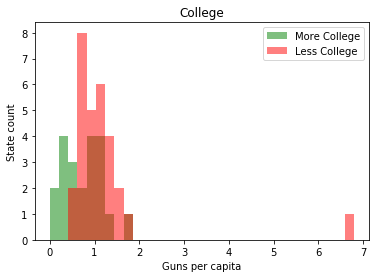

In [70]:
plt_stat("College")

On the other hand, states with more college educated populations seem to have fewer guns per capita.

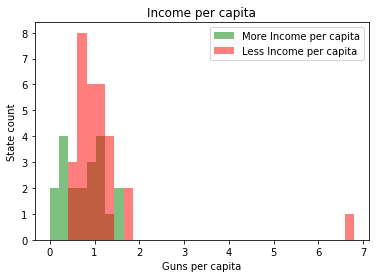

In [71]:
plt_stat("Income per capita")

The distributions overlap, which makes it difficult to draw any conclusion about income per capita and guns per capita.

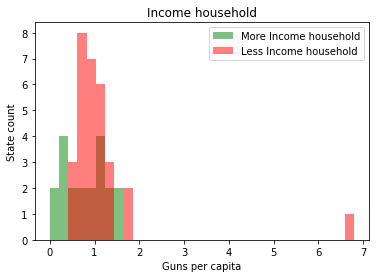

In [72]:
plt_stat("Income household")

Similar for the household income: no conclusion can be drawn from this.

As ethnicity and education appear to be the strongest correlators to guns per capita, from these histograms, then it makes sense to examine any quantitative relationship. A visual examination of the scatterplots (but without putting too much emphasis on the outlier, which is what a correlation coefficient could do) may give insight.

In [73]:
x = df["Guns per capita"]
y1 = df_states["White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)"]
y2 = df_states["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"]

<function matplotlib.pyplot.show(*args, **kw)>

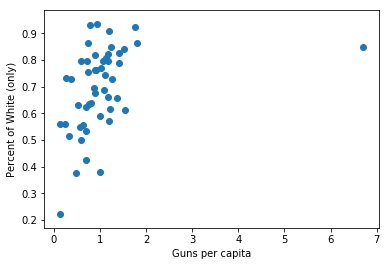

In [74]:
plt.scatter(x,y1)
plt.xlabel("Guns per capita")
plt.ylabel("Percent of White (only)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

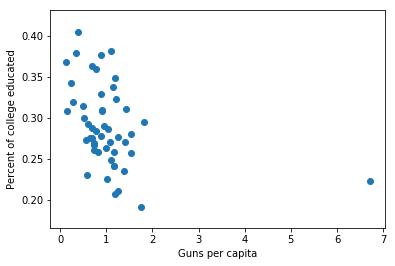

In [75]:
plt.scatter(x,y2)
plt.xlabel("Guns per capita")
plt.ylabel("Percent of college educated")
plt.show

Even ignoring the outlier, there appears to be a positive correlation between guns per capita and the White population, and a negative correlation between guns per capita and the college-educated population. The outlier, while not lying on the trend, would still be consistent with the positive/negative correlations.

### Question 2: Guns over time

Next, to investigate how gun ownership has changed over time, one method is to sum each state over each year, and compare them at the beginning and the end. Since a full year would be summed over twelve months, the initial and final years are removed from the data set as their information is missing.

As the months are listed as strings in the format "yyyy-mm", to group them by year, it suffices to take the first four items in the string.

In [76]:
df_gun["month"] = df_gun["month"].str[:4]                #Selects first four per entry in month column
df_gun.rename(columns={"month":"year"}, inplace=True)    #Rename column

To drop certain years, the following was used: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

In [77]:
#Drop any from the years 1998 and 2017, which don't have all months.
df_guns_year = df_gun.drop(df_gun[(df_gun["year"] == "2017") | (df_gun["year"] == "1998")].index)

Next, summing over the twelve months in each year, so they can be categorized by year and state:

In [78]:
#Sums over months with "groupby"
df_guns_year = df_guns_year.groupby(["year","state"], as_index=False).sum()

Now we're going to examine the first and last years, 1999 and 2016. Drop the remaining years and merge:

In [79]:
#Selects only the entries from the initial and final year
df_guns_1999 = df_guns_year[df_guns_year["year"] == "1999"].drop("year", axis=1).rename(columns={"totals":"1999 total guns"})
df_guns_2016 = df_guns_year[df_guns_year["year"] == "2016"].drop("year", axis=1).rename(columns={"totals":"2016 total guns"})

#Merges those two years onto one dataframe
df_guns_change = pd.merge(df_guns_1999, df_guns_2016, on="state", how="inner")
df_guns_change.head()

,state,1999 total guns,2016 total guns
0,Alabama,246756,616947
1,Alaska,43073,87647
2,Arizona,173548,416279
3,Arkansas,184616,266014
4,California,883144,2377167


Comparing the distributions, in particular the means, is one way of examining the change in guns:

In [80]:
df_guns_change.describe()

,1999 total guns,2016 total guns
count,55.000000,5.500000e+01
mean,164431.763636,4.986457e+05
std,175487.801422,6.691289e+05
min,0.000000,1.700000e+01
25%,38156.000000,1.117515e+05
50%,133674.000000,2.761610e+05
75%,207595.000000,6.072150e+05
max,883144.000000,3.676847e+06


In [81]:
df_guns_change["2016 total guns"].mean() - df_guns_change["1999 total guns"].mean()

334213.90909090906

In [82]:
df_guns_change["2016 total guns"].sum() / df_guns_change["1999 total guns"].sum()

3.0325386148020286

From this, it is evident that gun sales have increased over time overall. In fact, there are about three times as many guns between the years 1999 and 2016, and the distributions have gotten broader, from looking at the change in the standard deviation and interquartile range.

A scatterplot is another way to examine the relationship between these two variables.

Text(0.5,1,'Change in guns by state')

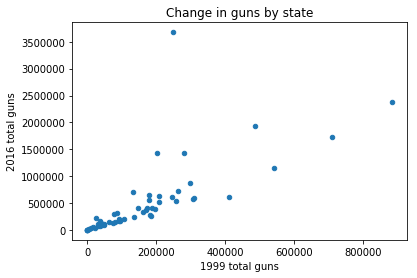

In [83]:
df_guns_change.plot(x="1999 total guns", y="2016 total guns", kind="scatter")    #Creates scatter plot
plt.title("Change in guns by state")                                             #Title

While a regression isn't being performed here, it appears many of the states and territories lie close to the line $y=2x$, which would indicate states and territories where guns would double between the years 1999 and 2016. It's fairly consistent across several states, from the ones with fewer guns to the ones with more guns, although the outliers appear to be far above the line, which would indicate faster than average gun growth.

Another way to examine gun trends is to look at the boxplot distributions of guns between the initial and final years.

<function matplotlib.pyplot.show(*args, **kw)>

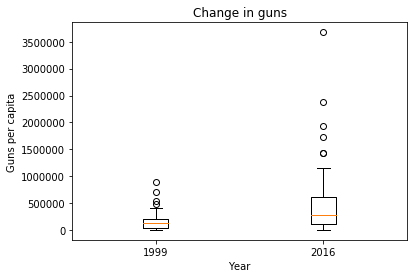

In [84]:
x = df_guns_change["1999 total guns"]   #Selects 1999
y = df_guns_change["2016 total guns"]   #Selects 2016

plt.boxplot([x,y])                      #Creates side-by-side boxplots
plt.xlabel('Year')                      #Label for x-axis
plt.ylabel('Guns per capita')           #Label for y-axis
plt.title('Change in guns')             #Title
plt.xticks([1,2],('1999','2016'))       #Ticks for x-axis
plt.show

Evidently guns have grown over years, but the boxplots show roughly similar distribution shapes, albeit stretched.

A more direct method of examining the trend of overall gun sales is to sum over all the states, then plot those totals over the years.

In [85]:
df_year = df_guns_year.groupby("year", as_index=False).sum()    #Sums over states
df_year.head()

,year,totals
0,1999,9043747
1,2000,8427096
2,2001,8820045
3,2002,8367069
4,2003,8402244


<function matplotlib.pyplot.show(*args, **kw)>

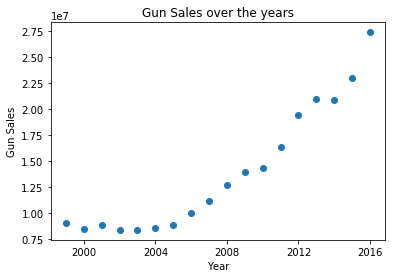

In [86]:
x=pd.to_numeric(df_year["year"])        #Converts years from strings to numbers
y=df_year["totals"]

plt.scatter(x,y)                        #Scatter plot
plt.xticks(np.arange(2000,2020,4))      #Sets the ticks for every 4 years
plt.xlabel('Year')                      #Label x-axis
plt.ylabel('Gun Sales')                 #Label y-axis
plt.title('Gun Sales over the years')   #Title
plt.show

It appears that gun sales were somewhat level between 1999 and 2005, but grow from 2005 to 2016, close to a linear pattern in the latter interval. This would suggest a shift around the year 2005, although the reason cannot be determined from this.

### Limitations

One major limitation is the grouping of data by states, since both the census data and the FBI gun data were grouped by that. While states may be statistically associated with different demographics, states are not monolithic entities, and going between cities or even counties can show a very different cross-section of the population. What could give a more accurate representation is if the census also determined gun purchase individually, then binary statistics could be done with each demographic of interest.

The gun data itself was sufficient to determine trends, but the data here did not say why these trends occurred. In particular, why is Kentucky an outlier in guns when it wasn't an outlier in the demographic variables correlated with guns, or what happened in 2005 that caused the increase in gun purchases, which isn't covered by any data collected, and might be related to entirely different variables.

<a id='conclusions'></a>
## Conclusions

Further quantitative study would be required to draw precise conclusions as to the correlations. But it is evident from this study that gun ownership tends to be correlated with a higher White population, a lower ethnic minority population, and a less educated population. Depending on the actual cause of this, there may be social implications.

Additionally, despite the varying demographics across states, there's a somewhat consistent growth pattern between guns in 1999 versus guns in 2016, with gun purchases increasing over time. This increase appears to be steady since 2005.